In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd

In [93]:
cv=pd.read_csv('http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip', encoding='ISO-8859-1')
cv.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-27,09e8dc,2,9,15,1,15,15,37,2,...,2,2,2,2,2,1,99,MÃ©xico,99,1
1,2020-04-27,1dd782,2,12,9,1,15,9,3,1,...,2,1,2,2,2,2,99,MÃ©xico,99,97
2,2020-04-27,0efbaf,2,9,28,2,16,28,32,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
3,2020-04-27,013a6c,1,3,15,2,15,15,106,1,...,2,1,2,2,1,3,99,MÃ©xico,99,97
4,2020-04-27,091a48,1,12,15,2,15,15,31,2,...,2,2,2,2,2,2,99,MÃ©xico,99,2


In [33]:
mun=gpd.read_file('/Users/Raul/Desktop/Programacion/Python/Covid/muni_2018gw/muni_2018gw.shp',encoding='utf-8')

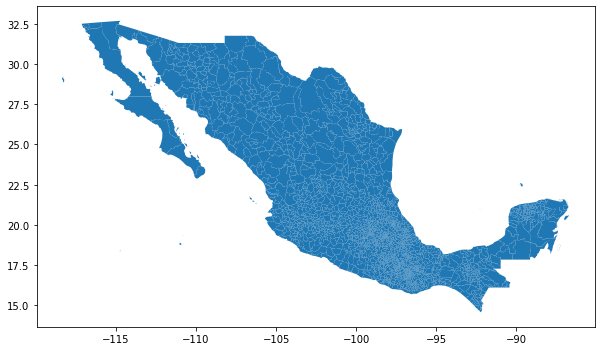

In [4]:
mun.plot(figsize=(10,10));

In [7]:
cv['mrg']=[str(i)+'-'+str(j) for i,j in zip(cv.ENTIDAD_RES,cv.MUNICIPIO_RES)]

In [6]:
cv.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,mrg
0,2020-04-26,031e57,1,4,9,2,9,9,16,2,...,2,1,2,99,2,99,MÃ©xico,99,2,9-16
1,2020-04-26,0a9147,2,12,26,1,26,26,30,1,...,2,2,2,1,2,99,MÃ©xico,99,97,26-30
2,2020-04-26,0f671b,2,12,5,2,5,5,30,1,...,2,2,2,1,2,99,MÃ©xico,99,97,5-30
3,2020-04-26,15f384,2,12,25,1,25,2,5,2,...,2,2,2,99,2,99,MÃ©xico,99,2,2-5
4,2020-04-26,037e26,2,4,14,1,14,14,120,2,...,2,2,2,99,2,99,MÃ©xico,99,2,14-120


In [8]:
mun['mrg']=[str(int(i))+'-'+str(int(j)) for i,j in zip(mun.CVE_ENT,mun.CVE_MUN)]

In [8]:
mun.head()

,CVE_ENT,CVE_MUN,CVEGEO,NOM_ENT,AREA,PERIMETER,NOM_MUN,COV_,COV_ID,geometry,mrg
0,01,001,01001,Aguascalientes,116635.92455,1166.35925,Aguascalientes,0,1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1-1
1,01,002,01002,Aguascalientes,54337.42654,543.37427,Asientos,1,2,"POLYGON ((-101.99941 22.21951, -101.99940 22.2...",1-2
2,01,003,01003,Aguascalientes,92335.78320,923.35783,Calvillo,2,3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9...",1-3
3,01,004,01004,Aguascalientes,12838.35453,128.38355,CosÃ­o,3,4,"POLYGON ((-102.25320 22.37449, -102.25239 22.3...",1-4
4,01,005,01005,Aguascalientes,49989.50926,499.89509,JesÃºs MarÃ­a,4,5,"POLYGON ((-102.31034 22.03716, -102.30653 22.0...",1-5


In [9]:
mu=mun[['mrg','geometry']]

In [10]:
gcv=pd.merge(cv,mu,on='mrg')

In [11]:
gcv.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,mrg,geometry
0,2020-04-26,031e57,1,4,9,2,9,9,16,2,...,1,2,99,2,99,MÃ©xico,99,2,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."
1,2020-04-26,16e0c3,1,12,9,2,9,9,16,1,...,2,2,2,1,99,MÃ©xico,99,97,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."
2,2020-04-26,000d46,2,12,9,2,21,9,16,1,...,2,2,1,1,99,MÃ©xico,99,97,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."
3,2020-04-26,01ac32,1,9,9,1,9,9,16,2,...,2,2,99,2,99,MÃ©xico,99,2,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."
4,2020-04-26,1327a7,1,4,15,1,9,9,16,1,...,2,2,99,2,99,MÃ©xico,99,97,9-16,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."


In [11]:
gcv=gpd.GeoDataFrame(gcv)

In [12]:
pos=gcv[gcv.RESULTADO==1]

In [13]:
pos=pos['mrg'].value_counts().reset_index()
pos.rename(columns={'index':'mrg','mrg':'cnt'},inplace=True)

In [14]:
pos=gpd.GeoDataFrame(pd.merge(pos,mu,on='mrg'))
pos

,mrg,cnt,geometry
0,2-4,733,"POLYGON ((-116.75525 32.55660, -116.75295 32.5..."
1,9-7,724,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
2,25-6,539,"POLYGON ((-107.14834 25.25916, -107.14772 25.2..."
3,9-5,513,"POLYGON ((-99.11789 19.59059, -99.11860 19.584..."
4,27-4,509,"POLYGON ((-92.61030 18.06882, -92.61189 18.062..."
...,...,...,...
762,30-54,1,"POLYGON ((-95.76649 18.31475, -95.76651 18.314..."
763,7-92,1,"POLYGON ((-93.38287 17.29748, -93.38310 17.296..."
764,11-44,1,"POLYGON ((-100.91078 20.56958, -100.91070 20.5..."
765,16-19,1,"POLYGON ((-102.61135 19.88179, -102.61146 19.8..."


In [15]:
mun[['CVE_ENT','NOM_ENT']].drop_duplicates().reset_index(drop=True)

,CVE_ENT,NOM_ENT
0,01,Aguascalientes
1,02,Baja California
2,03,Baja California Sur
3,04,Campeche
4,05,Coahuila de Zaragoza
5,06,Colima
6,07,Chiapas
7,08,Chihuahua
8,09,Ciudad de MÃ©xico
9,10,Durango


In [16]:
neg=gpd.GeoDataFrame(mu[~mu['mrg'].isin(pos['mrg'])])
neg

,mrg,geometry
2,1-3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,1-4,"POLYGON ((-102.25320 22.37449, -102.25239 22.3..."
20,3-9,"MULTIPOLYGON (((-111.56122 26.55573, -111.5606..."
26,4-6,"POLYGON ((-89.74847 20.17927, -89.73734 20.165..."
27,4-7,"POLYGON ((-91.73869 17.93618, -91.73954 17.935..."
...,...,...
2456,32-52,"POLYGON ((-101.78386 22.16604, -101.78366 22.1..."
2457,32-53,"POLYGON ((-101.94821 22.65201, -101.94607 22.6..."
2458,32-54,"POLYGON ((-101.65599 22.51381, -101.65586 22.5..."
2459,32-55,"POLYGON ((-102.69428 22.62230, -102.69476 22.6..."


## Graficación

In [2]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature


from matplotlib import cm
import matplotlib.ticker as mticker
#from matplotlib.colors import ListedColormap
from matplotlib.offsetbox import AnchoredText

from datetime import date

from geopy.distance import geodesic

(array([716.,  24.,  10.,   6.,   4.,   0.,   4.,   1.,   0.,   2.]),
 array([  1. ,  74.2, 147.4, 220.6, 293.8, 367. , 440.2, 513.4, 586.6,
        659.8, 733. ]),
 <a list of 10 Patch objects>)

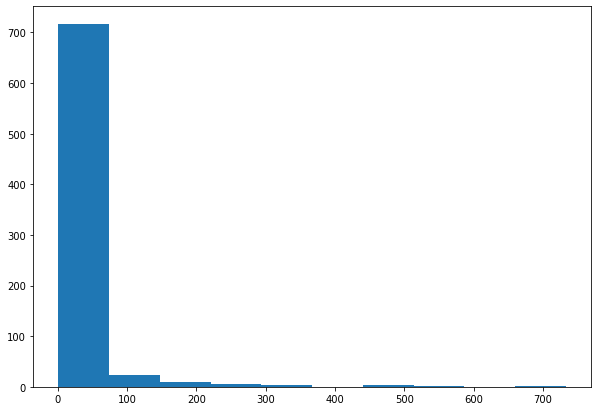

In [20]:
plt.figure(figsize=(10,7))
plt.hist(pos.cnt)

In [34]:
date.today().isoformat()

'2020-04-28'

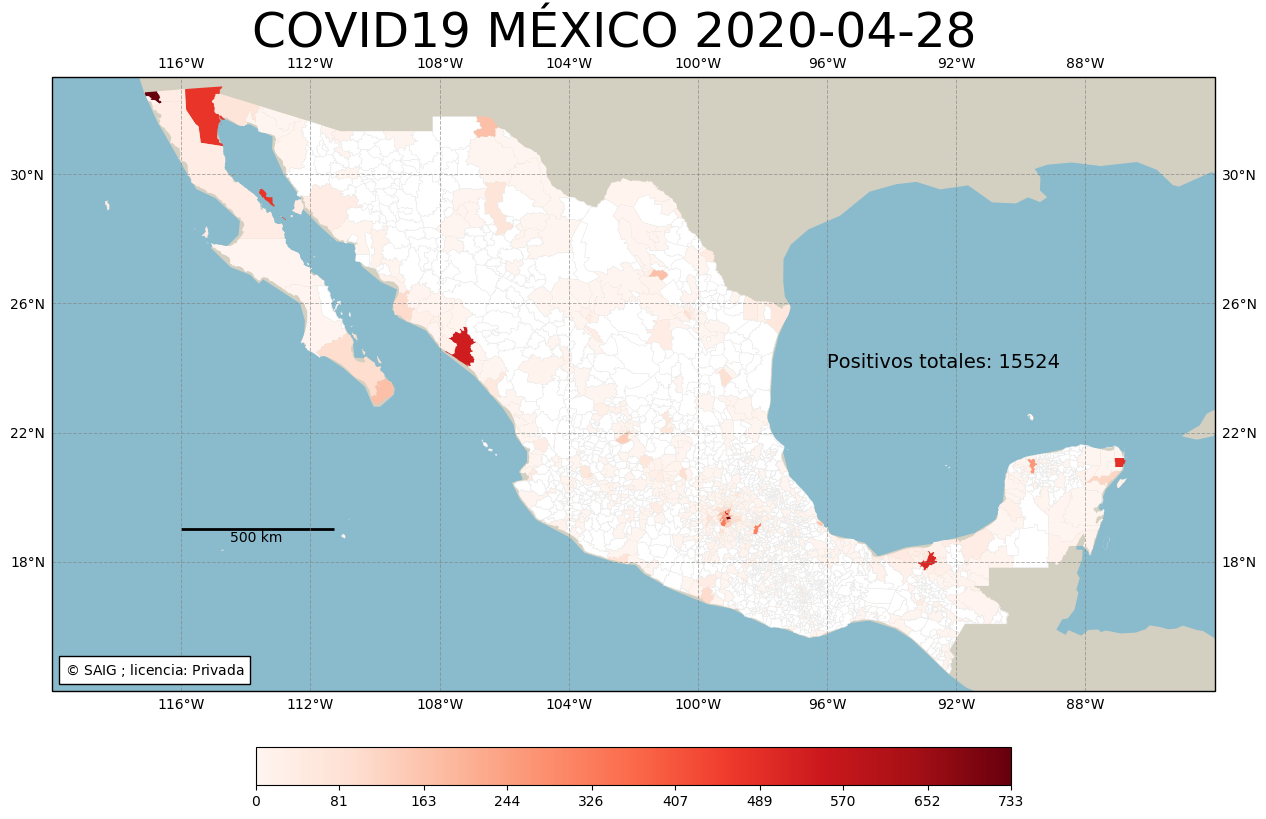

In [89]:
plt.figure(dpi=100,figsize=(15,15))
norm=cm.colors.Normalize(vmin=0,vmax=max(pos.cnt))
cmap=cm.Reds
ax=plt.axes(projection=ccrs.PlateCarree())
ext=[-120,-84,14,33]
ax.set_extent(ext, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN,facecolor='#8ABBCD')
ax.add_feature(cfeature.LAND,facecolor='#D3D0C1')

pos.plot('cnt',ax=ax,cmap=cmap,vmin=0,vmax=max(pos.cnt))
neg.plot(ax=ax,color='white',ec='#ECEBEB',linewidth=.3)
#ded.centroid.plot(ax=ax,markersize=pos.cnt,alpha=.4,color='k')
#est.boundary.plot(ax=ax,linewidth=.3,ec='k')
ticks=np.round(np.linspace(0,max(pos.cnt),10))
plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax,shrink=.65,ticks=ticks,orientation='horizontal',pad=.05)


gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=.7,color='gray',alpha=0.6,linestyle='--')

gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER

gl.xlocator=mticker.FixedLocator(np.arange(ext[0],ext[1]+4,4))
gl.ylocator=mticker.FixedLocator(np.arange(ext[2],ext[3]+4,4))

plt.suptitle('COVID19 MÉXICO '+date.today().isoformat(),fontsize=35,y=.73)

source='SAIG'
license='Privada'
text= AnchoredText("$\copyright$ {} ; licencia: {}"
                  ''.format(source,license),loc=3,prop={'size':10},frameon=True)

ax.add_artist(text)

plt.text(-96,24,'Positivos totales: '+str(np.sum(pos.cnt)),fontsize=14)

x1=-116
x2=-111.27

plt.hlines(19,x1,x2,linewidth=2)
plt.text(-114.5,18.6,'500 km');

#plt.savefig('aiuda.png',dpi=300,bbox_inches='tight');

In [84]:
p1 = (18, -116)
p2 = (18, -115)
geodesic(p1, p2).km

105.90485437837083

In [39]:
est=gpd.read_file('/Users/Raul/Desktop/Programacion/Python/Covid/dest2018gw/dest2018gw.shp',encoding='utf8')

In [23]:
ded=gcv[(gcv.FECHA_DEF!='9999-99-99') & (gcv.RESULTADO==1)]
ded=ded['mrg'].value_counts().reset_index()
ded.rename(columns={'index':'mrg','mrg':'cnt'},inplace=True)
ded=gpd.GeoDataFrame(pd.merge(ded,mu,on='mrg'))

ded

,mrg,cnt,geometry
0,2-4,121,"POLYGON ((-116.75525 32.55660, -116.75295 32.5..."
1,25-6,89,"POLYGON ((-107.14834 25.25916, -107.14772 25.2..."
2,9-5,63,"POLYGON ((-99.11789 19.59059, -99.11860 19.584..."
3,27-4,58,"POLYGON ((-92.61030 18.06882, -92.61189 18.062..."
4,23-5,54,"POLYGON ((-86.80184 21.21195, -86.80184 21.211..."
...,...,...,...
294,28-33,1,"POLYGON ((-97.90829 26.05750, -97.90764 26.052..."
295,12-69,1,"POLYGON ((-98.47410 17.36658, -98.47428 17.366..."
296,23-6,1,"POLYGON ((-88.65517 19.21769, -88.67001 19.217..."
297,29-29,1,"POLYGON ((-98.20681 19.24910, -98.20701 19.249..."


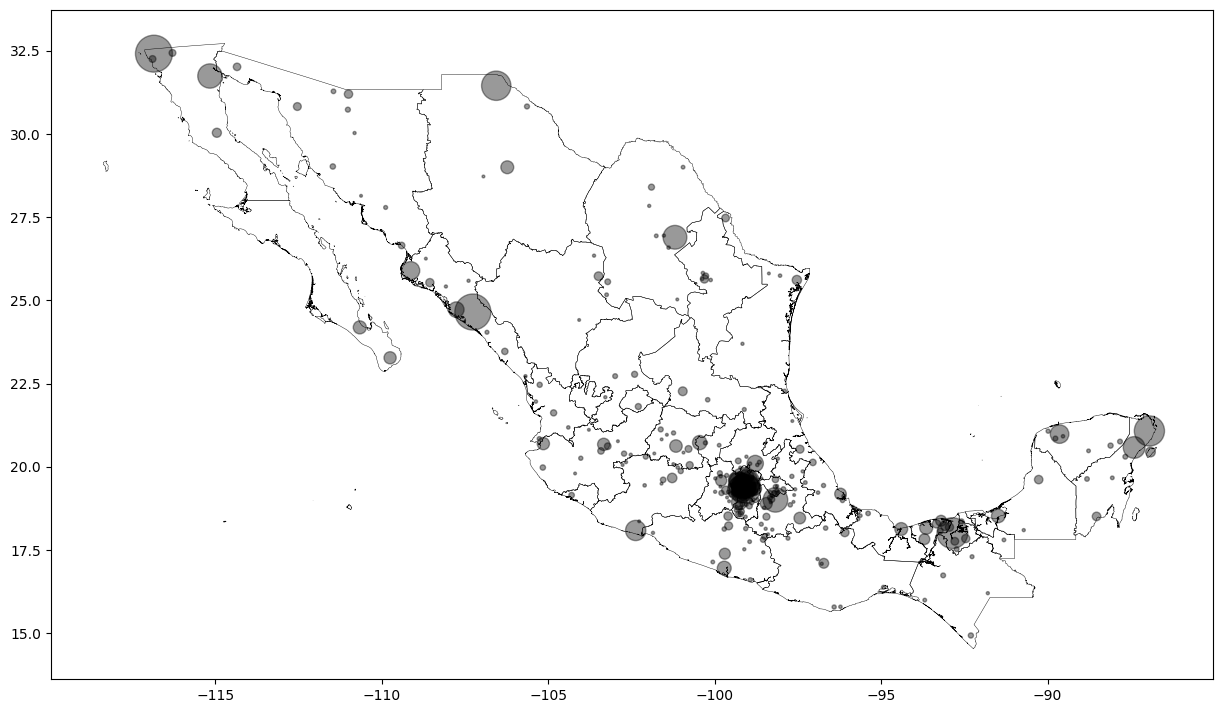

In [312]:
ax=est.boundary.plot(linewidth=.3,ec='k',figsize=(15,15))
ded.centroid.plot(ax=ax,markersize=pos.cnt,alpha=.4,color='k')

In [5]:
def readtxt(rut):
    dat=pd.read_csv(rut,delim_whitespace=True,header=None,names=['lon','lat','g'],
                   dtype={'lon': np.float32, 'lat': np.float32, 'g':np.float32}).sort_values(by='lat',ascending=False).reset_index(drop=True)
    #dat=dat.sort_values(by='lat',ascending=False).reset_index(drop=True)
    dat['lon']=-dat['lon']
    
    return dat

In [145]:
%timeit readtxt("/Users/Raul/Desktop/Data/modgeohat/Anomalia de Helmert.txt")

178 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [146]:
dat=readtxt("/Users/Raul/Desktop/Data/modgeohat/Anomalia de Helmert.txt")
dat.head()

,lon,lat,g
0,-118.979172,32.979172,-55.292000
1,-97.270828,32.979172,-24.312000
2,-97.187500,32.979172,-23.757999
3,-97.145828,32.979172,-24.975000
4,-97.104172,32.979172,-25.481001


In [6]:
def imgcreator(dat): 
    mat=[]
    for i in dat.lat.unique():
        df=dat[dat.lat==i]
        df=df.sort_values(by='lon')
        vc=list(np.array(df.g))
        mat.append(vc)
        #mat.append(list(dat[dat.lat==i].sort_values(by='lon').g))
    mat=np.array(mat)
    ggt=[dat.lon.min()-(df.lon.iloc[1]-df.lon.iloc[0])/2,(df.lon.iloc[1]-df.lon.iloc[0]),0,dat.lat.max()+(df.lon.iloc[1]-df.lon.iloc[0])/2,
         0,-(df.lon.iloc[1]-df.lon.iloc[0])]
    return mat,ggt

## [ggt](https://www.perrygeo.com/python-affine-transforms.html)

In [29]:
from osgeo import gdal
from osgeo import osr

import earthpy.spatial as es

In [27]:
def tifcreator(mat,nom):  
    dst_ds = gdal.GetDriverByName('GTiff').Create('/Users/Raul/Desktop/Data/tif/'+nom+'.tif', mat[0].shape[1], mat[0].shape[0], 1, gdal.GDT_Float32)
    dst_ds.SetGeoTransform(mat[1])    # Aplica la geotransformacion y la proyección
    srs = osr.SpatialReference()            # Establece el ensamble
    srs.ImportFromEPSG(6365) # Proyeccion UTM 14 `
    dst_ds.SetProjection(srs.ExportToWkt()) # Exporta el sistema de coordenadas
    dst_ds.GetRasterBand(1).WriteArray(mat[0])# Escribe la banda al raster
    dst_ds.GetRasterBand(1).SetNoDataValue(9999999)
    dst_ds.FlushCache()                     # Escribe en el disco
    dst_ds.GetRasterBand(1).SetDescription(nom)
    
    dst_ds = None

In [180]:
mat=imgcreator(dat)

In [199]:
tifcreator(mat,'AHT')

In [65]:
rut="/Users/Raul/Desktop/Data/modgeodens/Densidad Anómala Superficial.txt"
dat=readtxt(rut)
mat=imgcreator(dat)

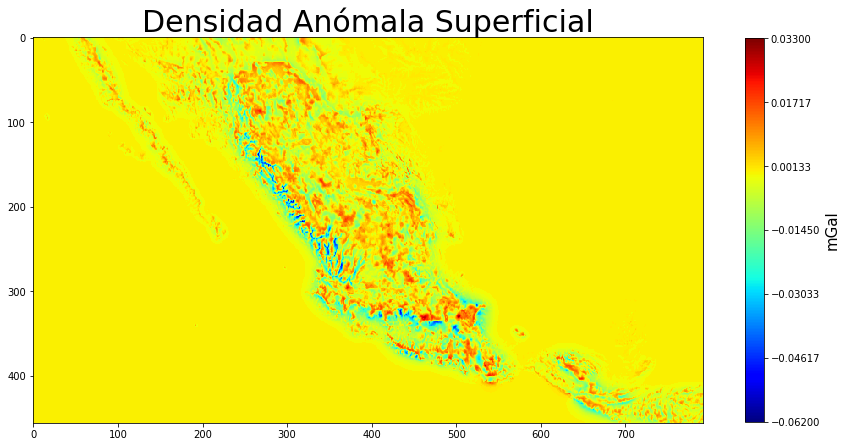

In [66]:
plt.figure(figsize=(15,15))
plt.imshow(mat[0],cmap='jet')
plt.title(rut.split('/')[-1][:-4],fontsize=30)
tks=np.linspace(np.amin(mat[0]),np.amax(mat[0]),7)
cbar=plt.colorbar(shrink=.47,ticks=tks);
cbar.set_label('mGal',fontsize=15)

In [77]:
def mapita(mat,rut):  
    plt.figure(figsize=(13,13))
    
    if (np.nanmin(mat[0])>-5) and (np.nanmax(mat[0])<5):
           hs = es.hillshade(mat[0]*400)
    else:
        hs = es.hillshade(mat[0])

    ax=plt.axes(projection=ccrs.PlateCarree())
    ext=[mat[1][0],mat[1][0]+mat[1][1]*mat[0].shape[1],mat[1][-3]+mat[1][-1]*mat[0].shape[0],mat[1][-3]]
    ax.set_extent(ext, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m',linewidth=2)

    est.boundary.plot(ax=ax,linewidth=1,ec='k',figsize=(15,15))

    ax.imshow(hs,origin='upper',transform=ccrs.PlateCarree(),extent=ext,cmap='gray',alpha=1)
    ax.imshow(mat[0],origin='upper',transform=ccrs.PlateCarree(),extent=ext,cmap='jet',alpha=.7)
    
   
    tks=np.linspace(np.nanmin(mat[0]),np.nanmax(mat[0]),7)
    norm=cm.colors.Normalize(vmin=np.nanmin(mat[0]),vmax=np.nanmax(mat[0]))
    cmap=cm.jet
    cbar=plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax,shrink=1,orientation='horizontal',pad=.07,ticks=tks)
    cbar.ax.tick_params(labelsize=13)
    cbar.set_label('mGal',fontsize=25,labelpad=10)
    
    gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha=.8,color='gray',linestyle='--')

    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}

    gl.xlocator=mticker.FixedLocator(np.arange(ext[0],ext[1]+4,4))
    gl.ylocator=mticker.FixedLocator(np.arange(ext[2],ext[3]+4,4))

    plt.suptitle(rut.split('/')[-1][:-4],fontsize=35,y=.82)
    
    x1=-116
    x2=-111.27

    plt.hlines(19,x1,x2,linewidth=4)
    plt.text(-114.7,18.3,'500 km',fontsize=15)
    
    plt.text(-91,32,'Res: '+str(round(mat[1][1],3))+'$^\circ$',fontsize=15)
    
    #plt.savefig("/Users/Raul/Desktop/Data/Mapas/"+rut.split('/')[-1][:-4]+".png",bbox_inches='tight',dpi=100);

In [625]:
mat[0].shape

(456, 792)

In [627]:
[mat[1][0],mat[1][0]+mat[1][1]*mat[0].shape[1],mat[1][-3]+mat[1][-1]*mat[0].shape[0],mat[1][-3]]

[-119.00000762939453,
 -85.99597930908203,
 13.997688293457031,
 33.00000762939453]

In [626]:
mat[1]

[-119.00000762939453, 0.041671753, 0, 33.00000762939453, 0, -0.041671753]

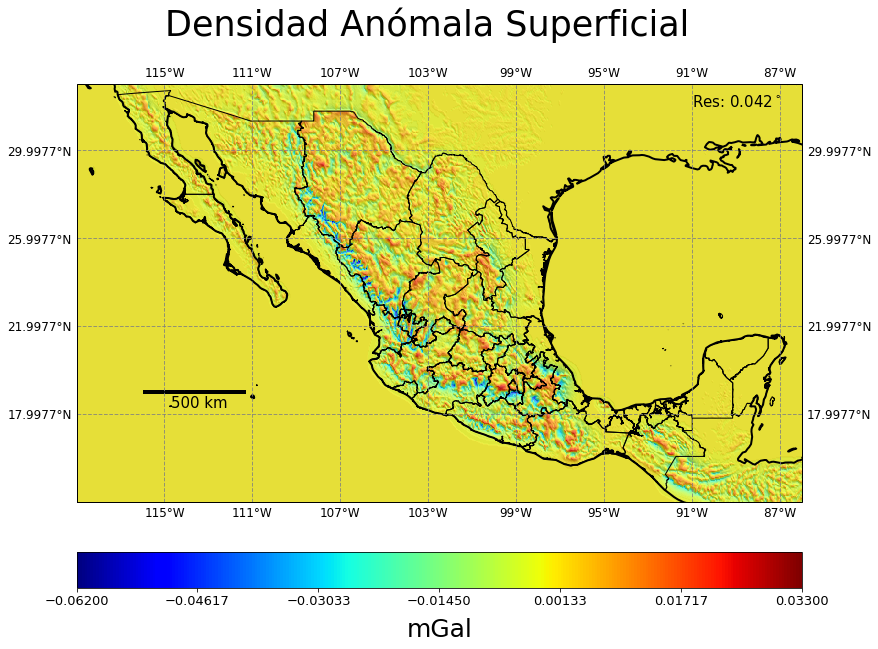

In [78]:
mapita(mat,rut)

In [4]:
from glob import glob

In [382]:
fl=glob('/Users/Raul/Desktop/Data/*/*.txt')

In [383]:
for i in fl:
    dat=readtxt(i)
    mat=imgcreator(dat)
    tifcreator(mat,i.split('/')[-1][:-4])
    #mapita(mat,i)

In [11]:
from rasterio.mask import mask
import rasterio
import json

import cv2 as cv

In [5]:
def getFeatures(gdf):
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [30]:
def clip(rut,est,ent):
    data = rasterio.open(rut)
    nl=est[est.CVE_ENT==ent]
    nl=nl.to_crs({'init': 'epsg:6365'})
    coords = getFeatures(nl)
    out_img, out_transform = mask(data, shapes=coords, crop=True)
    cl=out_img[0]
    cl=np.where(cl==0,9999999,cl)
    #data=cv.resize(cl, dsize=(round(cl.shape[1]*10),round(cl.shape[0]*10)),interpolation=cv.INTER_CUBIC)
    ggt2=list(out_transform)
    ggt2=[ggt2[2],ggt2[0],0,ggt2[-4],0,ggt2[-5]]
    rs=np.array([cl,ggt2])
    return rs

In [31]:
rs=clip('/Users/Raul/Desktop/Data/tif/DTMex.tif',est,'19')

In [32]:
tifcreator(rs,'DTMNL')

In [24]:
cl=np.where(rs[0]==9999999,np.nan,rs[0])

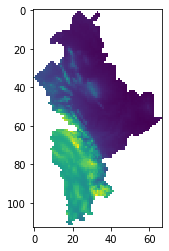

In [25]:
plt.imshow(cl)

In [109]:
def mapita2(mat,rut,ent,sep):  
    
    mat[0]=np.where(mat[0]==9999999,np.nan,mat[0])
    
    plt.figure(figsize=(13,13))
    
    hs = es.hillshade(mat[0])

    ax=plt.axes(projection=ccrs.PlateCarree())
    ext=[mat[1][0],mat[1][0]+mat[1][1]*mat[0].shape[1],mat[1][-3]+mat[1][-1]*mat[0].shape[0],mat[1][-3]]
    ax.set_extent(ext, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m',linewidth=2)
    
    ax.add_feature(cfeature.OCEAN,facecolor='#8ABBCD')
    ax.add_feature(cfeature.LAND,facecolor='#B4B7BA')

    est[est.CVE_ENT!=ent].plot(ax=ax,linewidth=2,color='#AF9D77',ec='k',figsize=(15,15))
    mun[mun.CVE_ENT==ent].boundary.plot(ax=ax,ec='k',linewidth=1)

    ax.imshow(hs,origin='upper',transform=ccrs.PlateCarree(),extent=ext,cmap='gray')
    ax.imshow(mat[0],origin='upper',transform=ccrs.PlateCarree(),extent=ext,cmap='jet',alpha=.7)
   
    tks=np.linspace(np.nanmin(mat[0]),np.nanmax(mat[0]),7)
    norm=cm.colors.Normalize(vmin=np.nanmin(mat[0]),vmax=np.nanmax(mat[0]))
    cmap=cm.jet
    cbar=plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax,shrink=1,pad=.13,ticks=tks)
    cbar.ax.tick_params(labelsize=13)
    cbar.set_label('Metros',fontsize=25,labelpad=10)
    
    gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1,alpha=.8,color='gray',linestyle='--')

    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}

    gl.xlocator=mticker.FixedLocator(np.arange(ext[0],ext[1]+sep,sep))
    gl.ylocator=mticker.FixedLocator(np.arange(ext[2],ext[3]+sep,sep))

    plt.suptitle(rut.split('/')[-1][:-6],fontsize=35,y=.95)
    plt.title(est[est.CVE_ENT==ent]['NOM_ENT'].iloc[0],loc='left')
    
    x1=-99.6
    x2=-98.61599

    plt.hlines(23.5,x1,x2,linewidth=4)
    plt.text(-99.27,23.4,'100 km',fontsize=15)
    
    plt.text(-99.15,27.5,'Res: '+str(round(mat[1][1],3))+'$^\circ$',fontsize=15)
    
    plt.savefig("/Users/Raul/Desktop/Data/Mapas/"+rut.split('/')[-1][:-4]+ent+".png",bbox_inches='tight',dpi=400);

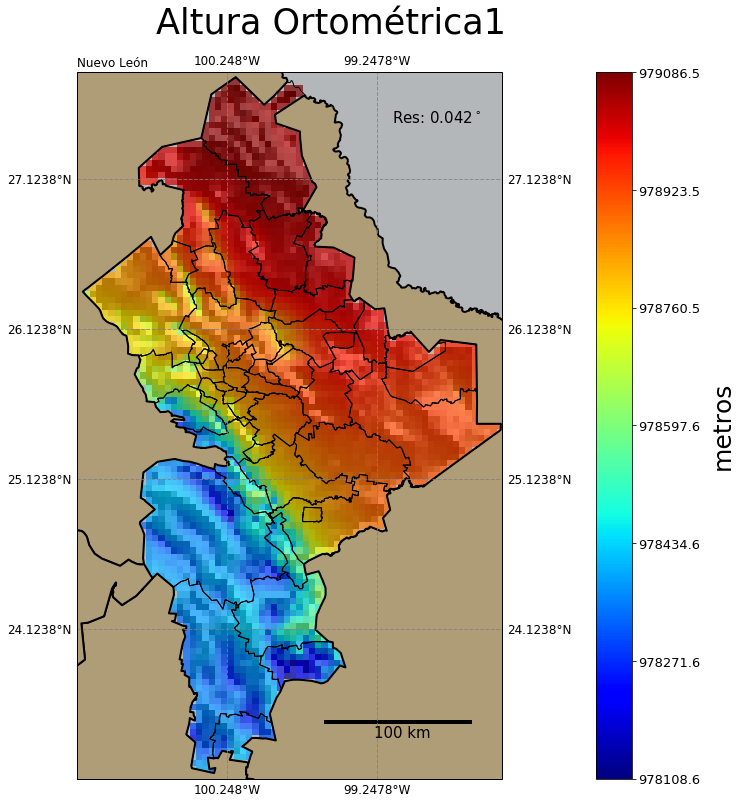

In [107]:
mapita2(rs,"'/Users/Raul/Desktop/Data/tif/NL/Altura Ortométrica19.tif'",'19',1)

In [115]:
ext=[rs[1][0],rs[1][0]+rs[1][1]*rs[0].shape[1],rs[1][-3]+rs[1][-1]*rs[0].shape[0],rs[1][-3]]
ext

[-101.20691500000156,
 -98.4150250000018,
 23.124215000000873,
 27.832925000000458]

In [103]:
fl2=glob('/Users/Raul/Desktop/Data/tif/NL/*.tif')
fl2

['/Users/Raul/Desktop/Data/tif/NL/Gravedad19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Anomalía de Bouger Completa19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Anomalía de Helmert Sobre el Terreno19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Altura Ortométrica19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Efecto Atomosférico Directo19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Densidad Anómala Superficial19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Gravedad Normal19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Efecto Topográfico Directo19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Anomalía por Aire Libre19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Efecto Topográfico Secundario Indirecto19.tif',
 '/Users/Raul/Desktop/Data/tif/NL/Corrección por Terreno19.tif']

In [110]:
fl2=['/Users/Raul/Desktop/Data/tif/NL/Altura Ortométrica19.tif']

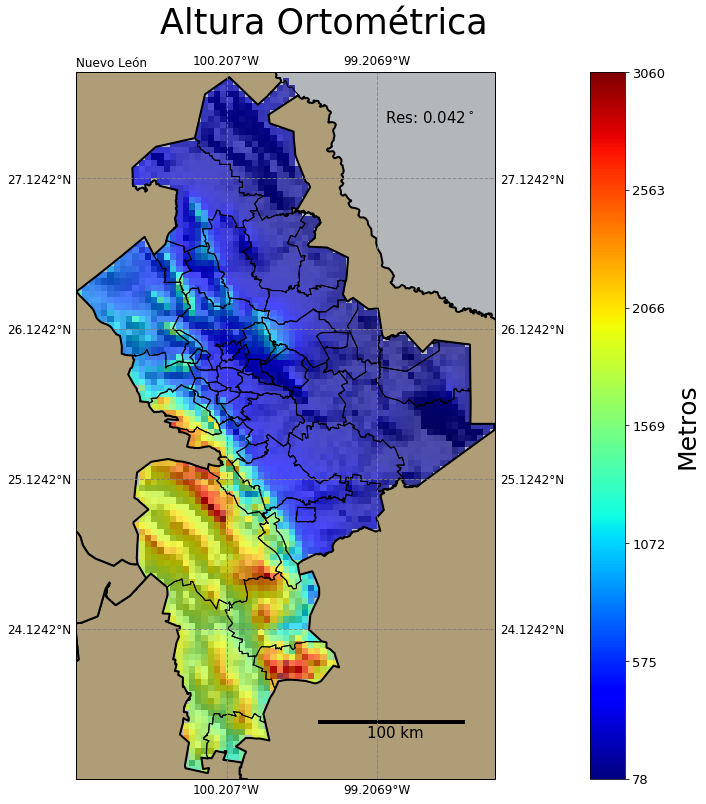

In [111]:
for i in fl2:
    #rs=clip(i,est,'19')
    im=gdal.Open(i)
    cl=im.ReadAsArray() 
    cl=np.where(cl==9999999,np.nan,cl)
    ggt=im.GetGeoTransform()
    rs=[cl,ggt]
    #tifcreator(rs,'NL/'+i.split('/')[-1][:-4]+'19')
    mapita2(rs,i,'19',1)

In [91]:
dem=gdal.Open('/Users/Raul/Desktop/Data/tif/Anomalía por Aire Libre.tif')

In [92]:
ggt=dem.GetGeoTransform()

(-119.00000762939453,
 0.0416717529296875,
 0.0,
 33.00000762939453,
 0.0,
 -0.0416717529296875)

In [99]:
def gN(phi):
    #g=978.049*(1+(0.0052884*(np.sin(np.radians(phi))**2))-0.0000059*(np.sin(2*np.radians(phi))**2)) #Internacional 
    g=978.0327*(1+(0.0053024*(np.sin(np.radians(phi))**2))-0.0000058*(np.sin(2*np.radians(phi))**2))*1000 #Cassini
    return g

In [203]:
data=np.array(dem.ReadAsArray()).astype('float')

for i in range(data.shape[0]):
    lt=ggt[-3]+i*ggt[-1]
    gv=gN(lt)
    data[i,:]=np.repeat(gv,len(data[i,:]))
    #data[i,:]=np.where(data[i,:]==0,np.nan,data)
    

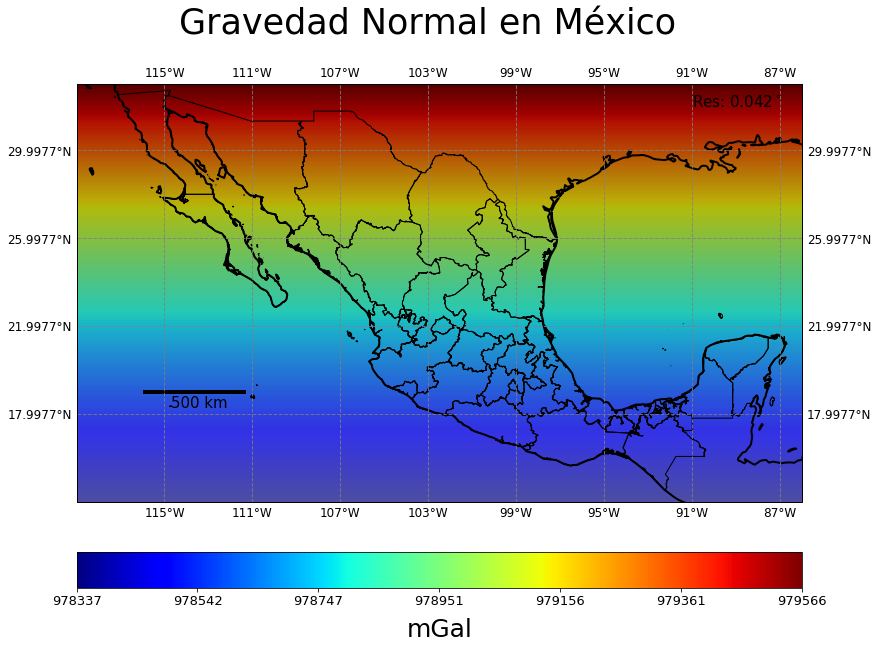

In [121]:
mapita([data,ggt],'Gravedad Normal en México.txt')

In [107]:
al=readtxt('/Users/Raul/Desktop/Data/modgeoal/Anomalía por Aire Libre.txt')
al=imgcreator(al)

## $g_{Aire_{libre}}=\Delta_{g_{Aire_{libre}}}+\gamma$

In [117]:
gal=al[0]+data

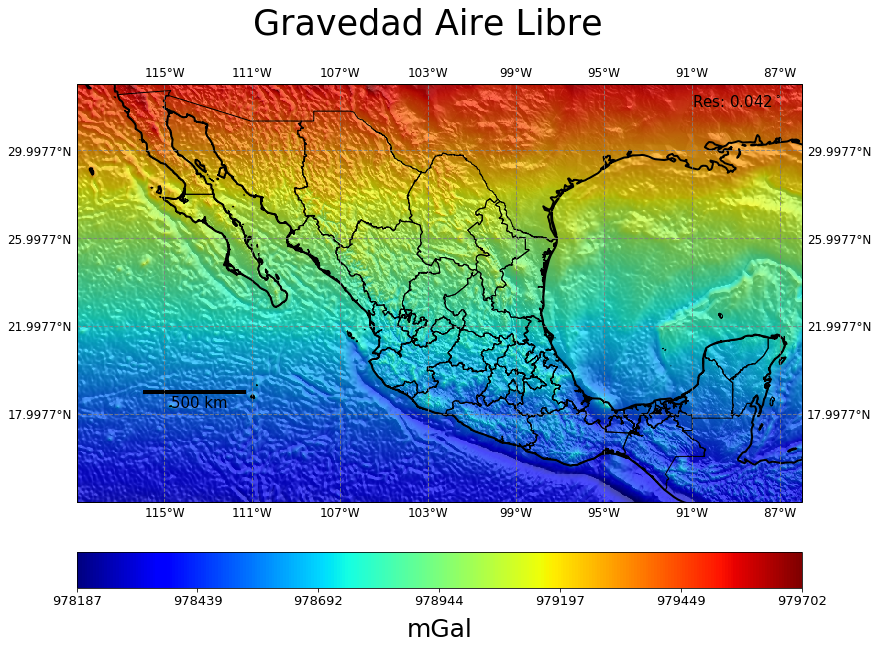

In [120]:
mapita([gal,ggt],'Gravedad Aire Libre.txt')

In [384]:
tifcreator([data,ggt],'Gravedad Normal en México')

In [570]:
with rasterio.open(fl2[0]) as src0:
    meta = src0.meta

meta.update(count = len(fl2))

with rasterio.open('/Users/Raul/Desktop/Data/allin1.tif', 'w', **meta) as dst:
    for id, layer in enumerate(fl2, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))
            

In [424]:
import netCDF4 as nc4

In [562]:
bands={}
for i,j in enumerate(fl2,start=1):
    bands['Mod'+str(i)]=j.split('/')[-1][:-4]

In [ ]:
m=rasterio.open('/Users/Raul/Desktop/Data/stack.tif')

In [601]:
f.close()

In [602]:
f = nc4.Dataset('/Users/Raul/Desktop/Data/sample.nc','w', format='NETCDF4')

tempgrp = f.createGroup('Modelos INEGI')

f.createDimension('lon', len(lon))
f.createDimension('lat', len(lat))

lon=[ggt[0]+i*ggt[1] for i in range(data.shape[1])]
lat=[ggt[-3]+i*ggt[-1] for i in range(data.shape[0])]

longitude = f.createVariable('Longitude', 'f4', 'lon')
latitude = f.createVariable('Latitude', 'f4', 'lat')

longitude[:] = lon #The "[:]" at the end of the variable instance is necessary
latitude[:] = lat
for i in range(1,len(fl2)+1):
    temp = tempgrp.createVariable('Mod'+str(i), 'f4', ('lat', 'lon'))
    temp[:,:] = tt.read(i)
    temp.units = 'mGal'
#f.close()

f.description = str(bands)
#Add local attributes to variable instances
longitude.units = 'degrees east'
latitude.units = 'degrees north'
f.Datum = 'ITRF08'
f.GGT = str(ggt)

In [603]:
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: {'Mod1': 'Grvedad en México', 'Mod2': 'Corrección por Terreno', 'Mod3': 'Efecto Topográfico Secundario Indirecto', 'Mod4': 'Efecto Atomosférico Directo', 'Mod5': 'Anomalía de Helmert Sobre el Terreno', 'Mod6': 'Anomalía por Aire Libre', 'Mod7': 'Efecto Topográfico Directo', 'Mod8': 'Densidad Anómala Superficial', 'Mod9': 'Gravedad Normal en México', 'Mod10': 'Anomalía de Bouger Completa'}
    Datum: ITRF08
    GDAL_Affine_GGT: (-119.00000762939453, 0.0416717529296875, 0.0, 33.00000762939453, 0.0, -0.0416717529296875)
    dimensions(sizes): lon(792), lat(456)
    variables(dimensions): float32 Longitude(lon), float32 Latitude(lat)
    groups: Modelos INEGI

In [593]:
f.description

"{'Mod1': 'Grvedad en México', 'Mod2': 'Corrección por Terreno', 'Mod3': 'Efecto Topográfico Secundario Indirecto', 'Mod4': 'Efecto Atomosférico Directo', 'Mod5': 'Anomalía de Helmert Sobre el Terreno', 'Mod6': 'Anomalía por Aire Libre', 'Mod7': 'Efecto Topográfico Directo', 'Mod8': 'Densidad Anómala Superficial', 'Mod9': 'Gravedad Normal en México', 'Mod10': 'Anomalía de Bouger Completa'}"

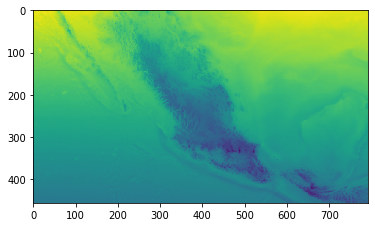

In [595]:
plt.imshow(f['Modelos INEGI'].variables['Mod3'][:,:])

In [528]:
f = nc4.Dataset('/Users/Raul/Desktop/Data/sample.nc','r')

In [524]:
tt.read(1)

array([[979509.56, 979517.6 , 979529.44, ..., 979487.9 , 979483.6 ,
        979479.44],
       [979505.94, 979510.9 , 979520.2 , ..., 979479.2 , 979476.3 ,
        979476.75],
       [979504.5 , 979506.  , 979511.1 , ..., 979474.7 , 979470.9 ,
        979471.  ],
       ...,
       [978322.4 , 978324.06, 978325.2 , ..., 978030.3 , 978056.4 ,
        978069.44],
       [978322.2 , 978324.5 , 978325.4 , ..., 978102.3 , 978125.7 ,
        978142.  ],
       [978321.5 , 978324.2 , 978324.8 , ..., 978102.9 , 978150.4 ,
        978124.9 ]], dtype=float32)

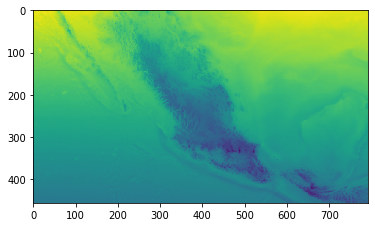

In [530]:
plt.imshow(np.array(f.groups['Gravedad Normal']['Temperature'][:,:]))

In [476]:
print(f.groups['Gravedad Normal']) #same as print(tempgrp)

<class 'netCDF4._netCDF4.Group'>
group /Gravedad Normal:
    dimensions(sizes): lon(792), lat(456)
    variables(dimensions): float32 Longitude(lon), float32 Latitude(lat), float32 Temperature(lon,lat)
    groups: 



In [571]:
m=rasterio.open('/Users/Raul/Desktop/Data/stack.tif')

In [143]:
#plt.rcParams.update(plt.rcParamsDefault)

In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select

import time

In [71]:
rut='https://www.inegi.org.mx/app/geo2/rgnp/MarcasXEstado.jsp?cveEdo=01&tipo=3'

driver = webdriver.Safari()

driver.get(rut)

content = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/div/div[8]/div[1]/select')

select=Select(content)

options=content.find_elements_by_tag_name('option')

c=0

for i in options[:3]:
    
    if i==options[0]:
        time.sleep(3)
        val=i.get_attribute('value')
        csv=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/div/div[8]/div[2]/div/ul/li[4]/a')
        driver.execute_script("arguments[0].click()", csv)
    
    else:
        opt=options[c]
        time.sleep(3)
        val=opt.get_attribute('value')
        select.select_by_value(val)
        time.sleep(3)
    
    csv=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/div/div[8]/div[2]/div/ul/li[4]/a')
    driver.execute_script("arguments[0].click()", csv)
    
    time.sleep(3)
    
    driver.get(rut)

    time.sleep(6)
    
    content = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/div/div[8]/div[1]/select')
    
    select=Select(content)

    options=content.find_elements_by_tag_name('option')
    
    c+=1
    

In [64]:
'https://www.inegi.org.mx/app/geo2/rgnp/descargaArchivoGestor.do?ruta=/data/geo/marcasgeo/CSV_01'+val+'_EGG.csv',

('https://www.inegi.org.mx/app/geo2/rgnp/descargaArchivoGestor.do?ruta=/data/geo/marcasgeo/CSV_01001_EGG.csv',)

In [68]:
pd.read_csv('https://www.inegi.org.mx/app/geo2/rgnp/descargaArchivoGestor.do?ruta=/data/geo/marcasgeo/CSV_01001_EGG.csv')

HTTPError: HTTP Error 500: Internal Server Error